Generally once we get some data, first thing come into our mind is that which algorithm is best for me to build model using this data. 

**Spot-Checking** is a mechanism which can give an initial idea about the best suited algorithm for you based on the data in hand. In spot checking we try all possible algorithms and check their result. It help us to choose 2 or 3 best algorithms and then can apply optimization techniques on those algorithms like regularization, feature engineerin

You cannot know which algorithms are best suited to your problem before hand. You must trial a number of methods and focus attention on those that prove themselves the most promising.

In this post you will discover following regression  algorithms that you can use when spot checking your regression problem in Python with scikit-learn.


4 Linear Machine Learning Algorithms:

    Linear Regression
    Ridge Regression
    LASSO Linear Regression
    Elastic Net Regression

3 Nonlinear Machine Learning Algorithms:

    K-Nearest Neighbors
    Classification and Regression Trees
    Support Vector Machines

We will not do any feature engineering or optimization. This code is just to check that how with minimal code we can compare different algorithms.
This code will help you that in a baseline version which algorithm will give best results.

We will use sklearn housing dataset for the same.


### Imports

In [4]:
import pandas
import matplotlib.pyplot as plt


from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

### Load dataset

In [5]:

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values

### select dependent and independent variables

In [6]:
X = array[:,0:13]
Y = array[:,13]

### Models
We will evaluate all the models one by one on the dataset. So create a list of models and append all models in it

In [7]:
models = []
models.append(('LR', LinearRegression()))
models.append(('RID', Ridge()))
models.append(('LAS', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

### Run models

We have 6 models so we will run it one by one on the data and check accuracy of each model

In [11]:
results = []
names = []
seed = 7
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -34.705256 (45.573999)
RID: -34.078246 (45.900034)
LAS: -34.464085 (27.888592)
EN: -31.164574 (22.708675)
KNR: -107.286839 (79.839529)
DTR: -40.643287 (30.980540)
SVR: -91.047824 (71.101574)


### Plot results


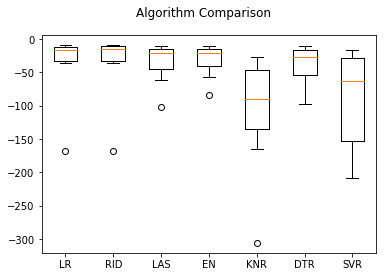

In [12]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

in mean square error case the smaller value is better. So do not focus on the sign part the least value which is for Elastic net is best so we will use this or any any other linear regressor which are least in comparison of non linear regressors.